<a href="https://colab.research.google.com/github/sofiadelech3/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Elemento de list



In [2]:
# prompt:  armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Garcia', 'Sanchez', 'Romero', 'Torres']
nombres = ['Juan', 'Maria', 'Jose', 'Ana', 'Carlos', 'Laura', 'Pedro', 'Sofia', 'Miguel', 'Isabel']
materias = ['Matemáticas', 'Lengua y Literatura', 'Ciencias Naturales', 'Ciencias Sociales', 'Historia', 'Geografía', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Tecnología']

# Create a list to store the data
data = []

# Generate 100 rows of data
for i in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)

  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])


# Create the DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Display the DataFrame
df

,Apellido,Nombre,DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Lopez,Pedro,26697895,Ciencias Naturales,7,5,1,16
1,Martinez,Miguel,62989249,Inglés,6,10,9,9
2,Garcia,Laura,95165524,Artes,4,6,3,18
3,Torres,Isabel,81136662,Geografía,8,1,7,14
4,Martinez,Carlos,60048420,Geografía,4,7,7,18
...,...,...,...,...,...,...,...,...
95,Gomez,Miguel,38376519,Lengua y Literatura,5,2,7,13
96,Gonzalez,Ana,84652224,Geografía,9,2,8,12
97,Martinez,Ana,20543750,Geografía,9,2,2,11
98,Lopez,Sofia,88565396,Tecnología,8,5,2,3


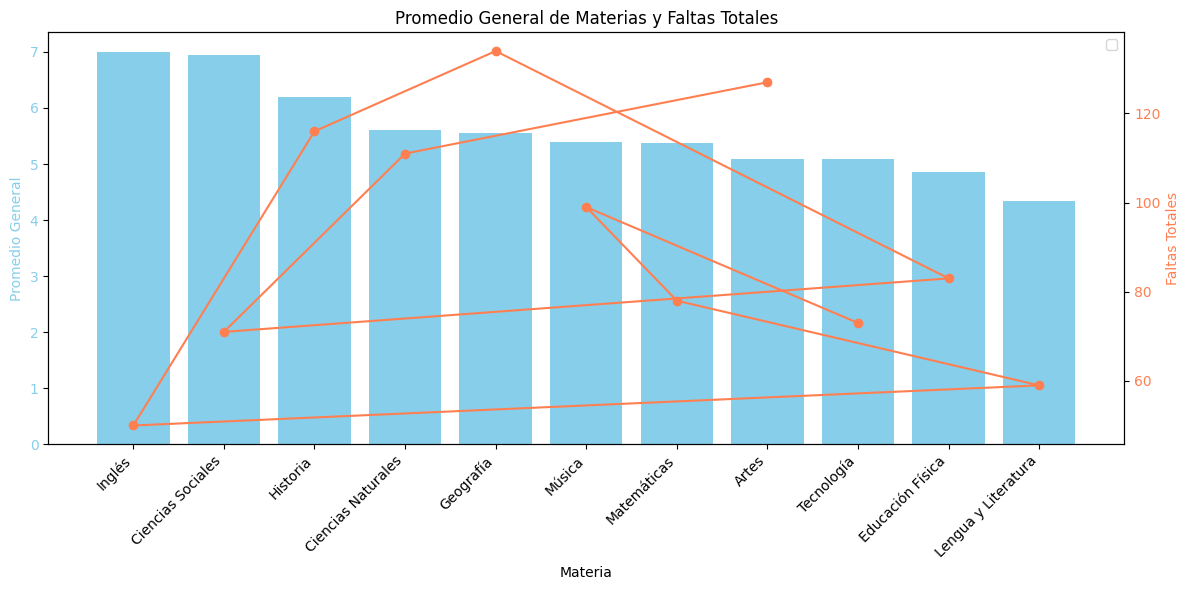

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean'})
average_grades['Promedio General'] = average_grades.mean(axis=1)

# Sort subjects by average grade in descending order
average_grades = average_grades.sort_values('Promedio General', ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
ax1.bar(average_grades.index, average_grades['Promedio General'], color='skyblue')
ax1.set_xlabel('Materia')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas Totales')
plt.xticks(rotation=45, ha='right')

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences, color='coral', marker='o')
ax2.set_ylabel('Faltas Totales', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')


# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ['Promedio General'] + labels2, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [6]:
df.to_csv("datos_alumnos.csv", index=False)